<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


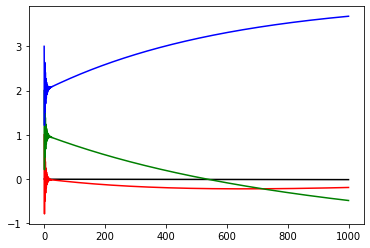

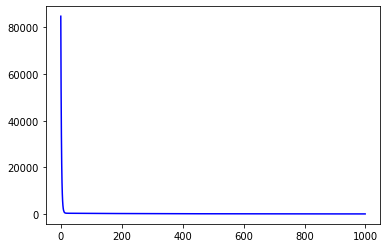

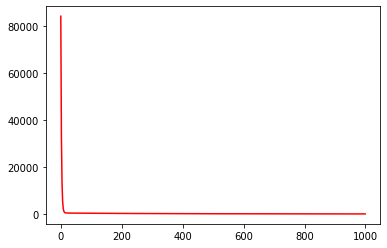

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import csv
drive.mount('gdrive')

test_path = "/content/gdrive/My Drive/Colab Notebooks/Assignment04/data_test.csv"
train_path = "/content/gdrive/My Drive/Colab Notebooks/Assignment04/data_train.csv"

x_test_data = []
y_test_data = []
z_test_data = []
h_test_data = []

x_train_data = []
y_train_data = []
z_train_data = []
h_train_data = []


with open(test_path, newline='') as myfile:
    test_data  = csv.reader(myfile, delimiter=',')
    for i in test_data:
      x_test_data.append(float(i[0]))
      y_test_data.append(float(i[1]))
      z_test_data.append(float(i[2]))
      h_test_data.append(float(i[3]))

with open(train_path, newline='') as myfile:
    train_data  = csv.reader(myfile, delimiter=',') 
    for i in train_data:
      x_train_data.append(float(i[0]))
      y_train_data.append(float(i[1]))
      z_train_data.append(float(i[2]))
      h_train_data.append(float(i[3]))


###
# Assignment03로부터 불러옴
# learning_rate 수정
###

learning_rate = 2*1e-5 # 학습률

errors0 = [] # 경사하강법에서 기울기 변화율에 비례하는 값을 저장
errors1 = [] # while문(learning loop) 종료조건으로 활용
errors2 = [] # 최근 두 개의 errors값을 비교 후 종료
errors3 = []

theta0 = 0 # theta0 생성
theta1 = 1 # theta1 생성
theta2 = 2 # theta2 생성
theta3 = 3 # theta3 생성

R_theta0 = []
R_theta1 = []
R_theta2 = []
R_theta3 = []
R_J_train = []
R_J_test = []


j=0
# Learning loop
while True:
  R_theta0.append(theta0)
  R_theta1.append(theta1)
  R_theta2.append(theta2)
  R_theta3.append(theta3)
  tmp0=0 # theta0의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  tmp1=0 # theta1의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  tmp2=0 # theta2의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  tmp3=0 # theta3의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값

  j+=1
  # 경사하강법 Loop, 목적함수의 미분값 계산 
  for i in range(len(x_train_data)):
    tmp0+=learning_rate*(theta0+theta1*x_train_data[i]+theta2*y_train_data[i]+theta3*z_train_data[i]-h_train_data[i])/len(x_train_data)
    tmp1+=learning_rate*x_train_data[i]*(theta0+theta1*x_train_data[i]+theta2*y_train_data[i]+theta3*z_train_data[i]-h_train_data[i])/len(x_train_data)
    tmp2+=learning_rate*y_train_data[i]*(theta0+theta1*x_train_data[i]+theta2*y_train_data[i]+theta3*z_train_data[i]-h_train_data[i])/len(x_train_data)
    tmp3+=learning_rate*z_train_data[i]*(theta0+theta1*x_train_data[i]+theta2*y_train_data[i]+theta3*z_train_data[i]-h_train_data[i])/len(x_train_data)

  # 계산된 목적함수의 미분값을 theta0과 theta1에 대입
  theta0-=tmp0
  theta1-=tmp1
  theta2-=tmp2
  theta3-=tmp3
  
  latest = len(R_theta0) - 1

  J_train = 0
  J_test = 0
  for i in range(len(x_train_data)):
    J_train += (theta0 + theta1 * x_train_data[i] + theta2 * y_train_data[i] + theta3 * z_train_data[i] - h_train_data[i]) ** 2
    J_test += (theta0 + theta1 * x_test_data[i] + theta2 * y_test_data[i] + theta3 * z_test_data[i] - h_test_data[i]) ** 2
  J_train /= (2*len(x_train_data))
  J_test /= (2*len(x_test_data))
  R_J_train.append(J_train)
  R_J_test.append(J_test)  

  if(j==1000):
    break;


plt.figure()
plt.plot(R_theta0,color='k')
plt.plot(R_theta1,color='r')
plt.plot(R_theta2,color='g')
plt.plot(R_theta3,color='b')
plt.show()

plt.figure()
plt.plot(R_J_train, color='b')
plt.show()

plt.figure()
plt.plot(R_J_test, color='r')
plt.show()

